<a href="https://colab.research.google.com/github/alyshapm/fods/blob/main/WEEK5_FoDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Measuring probability of having an illness from a sample

Group: Alysha Maulidina, Chellshe Love, Kimberly Mazel

Dataset source: https://www.kaggle.com/datasets/carlolepelaars/toy-dataset

In [ ]:
# Importing the necessary libraries
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

import pandas as pd
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Reading the dataset
df_toy = pd.read_csv("toy_dataset.csv")
df_toy

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [ ]:
# Obtaining a sample of 30 people
df_toy = df_toy.sample(frac=0.0002)
print(df_toy)

        Number             City  Gender  Age    Income Illness
135311  135312        San Diego    Male   53  112836.0      No
71432    71433      Los Angeles  Female   30   79673.0      No
97735    97736      Los Angeles    Male   41  104756.0      No
16844    16845           Dallas    Male   50   50550.0      No
63598    63599    New York City  Female   59   64990.0      No
5046      5047           Dallas    Male   36   39912.0     Yes
132111  132112  Washington D.C.    Male   64   69640.0      No
73257    73258      Los Angeles    Male   34  101257.0      No
139449  139450           Austin    Male   32   90222.0      No
52142    52143    New York City  Female   49   93384.0      No
111485  111486    Mountain View  Female   46  129423.0      No
46550    46551    New York City  Female   46   87956.0      No
88723    88724      Los Angeles    Male   34  100977.0      No
112820  112821    Mountain View  Female   26  147154.0     Yes
40002    40003    New York City  Female   31   99132.0 

In [ ]:
# Splitting the dataset into features and target variable
feature_cols=['City','Gender','Age','Income']
X = df_toy[feature_cols] # Features
y = df_toy['Illness'] # Target variable

In [ ]:
# .get_dummies() converts categorical data into dummy variables
X = pd.get_dummies(X)

In [ ]:
X

,Age,Income,City_Austin,City_Boston,City_Dallas,City_Los Angeles,City_Mountain View,City_New York City,City_San Diego,City_Washington D.C.,Gender_Female,Gender_Male
135311,53,112836.0,0,0,0,0,0,0,1,0,0,1
71432,30,79673.0,0,0,0,1,0,0,0,0,1,0
97735,41,104756.0,0,0,0,1,0,0,0,0,0,1
16844,50,50550.0,0,0,1,0,0,0,0,0,0,1
63598,59,64990.0,0,0,0,0,0,1,0,0,1,0
5046,36,39912.0,0,0,1,0,0,0,0,0,0,1
132111,64,69640.0,0,0,0,0,0,0,0,1,0,1
73257,34,101257.0,0,0,0,1,0,0,0,0,0,1
139449,32,90222.0,1,0,0,0,0,0,0,0,0,1
52142,49,93384.0,0,0,0,0,0,1,0,0,1,0


In [ ]:
# Using DecisionTreeClassifier from sklearn with entropy as the criterion
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)
y_predict = model.predict(X)

# Getting the accuracy score of the prediction
print(metrics.accuracy_score(y,y_predict))

1.0


In [ ]:
# Printing the arrays of y and y_predict
# .ravel() returns a 1d array of the input-array elements with the same type
print(y.ravel())
print(y_predict.ravel())

['No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes']
['No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes']


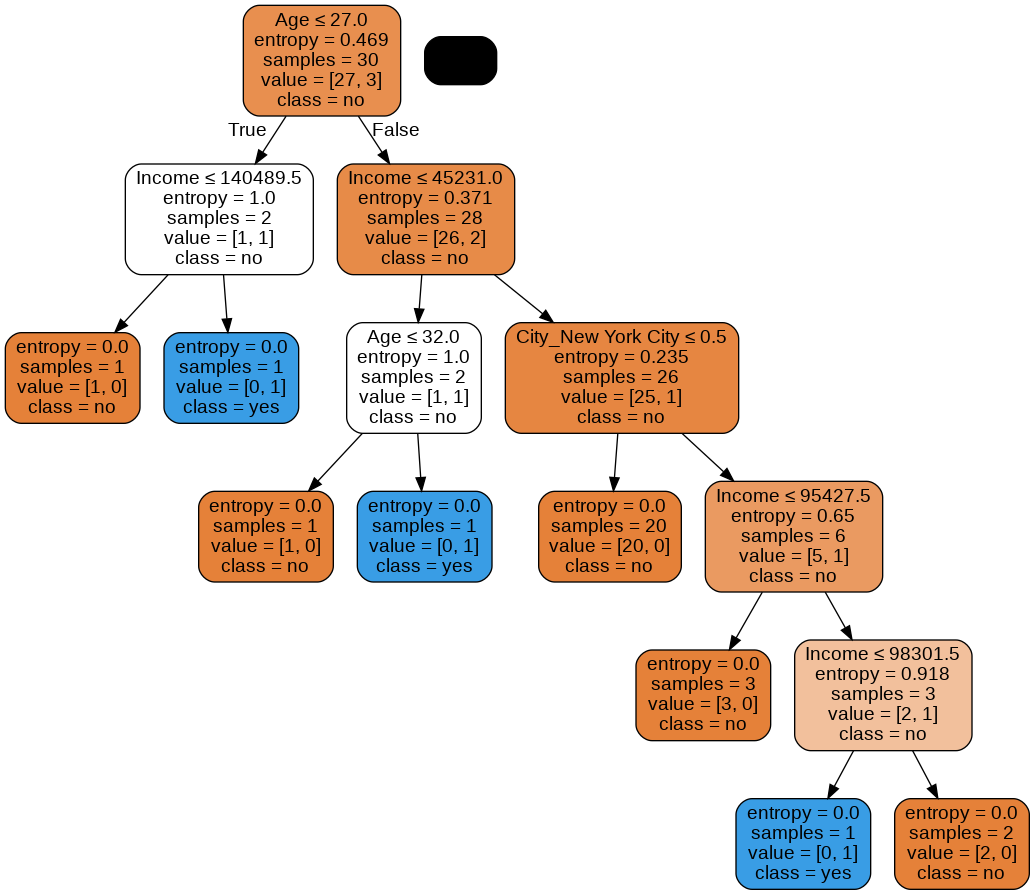

In [ ]:
# Displaying the decision tree by creating it using graphs
dot_data = StringIO()

# export_graphviz is used to export a decision tree in DOT format
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['no','yes'])

# The DOT format is then made into a graph using .graph_from_dot_data()
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('illnessprobability.png')
Image(graph.create_png())

## To read the tree:

Where class='No'
1. If age > 27.0 and Income > 140489.5 
2. If age > 32.0 and Income > 45231.0
3. If age <= 27.0, income <= 45231.0, city not New York City
4. If age <= 27.0, income > 95427.0, city New York City

Where class='Yes''
1. If age > 27 and income <= 140489.5 
2.  If age <= 32.0 and Income > 45231.0
3. If income > 98301.5, age <= 27.0, city New York City

>Predicting data for a specific case: 39 y.o. female living in Los Angeles with income of 90000.

In [ ]:
# Testing the decision tree
X_test = pd.DataFrame({"Age":[39],
                      "Income":[90000],
                      "City_Austin":[0],
                      "City_Boston":[0],
                      "City_Dallas":[0],
                      "City_Los Angeles":[1],
                      "City_Mountain":[0],
                      "City_New York City":[0],
                      "City_San Diego":[0],
                      "City_Washington D.C.":[0],
                      "Gender_Female":[1],
                      "Gender_Male":[0]
                      })

y_predict= model.predict(X_test)
print(y_predict)

['No']
